<a href="https://colab.research.google.com/github/Mohamed-Harish-M-123/Capstone-Project-IV/blob/main/Online_Retail_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Project Name: Online Retail Customer Segmentation**
####**Project Type:** Unsupervised ML
####**Contribution:** Individual
####**Name:** MOHAMED HARISH

###**GitHub link:** https://github.com/Mohamed-Harish-M-123/Capstone-Project-IV

##**Business context:**
####In this project, our task is to identify major customer segments on a transactional data set which contains all the transactions occuring between 01/12/2010 and 09/12/2011 for a UK based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customer of the company are wholesalers.

##**Problem statement:**
####The problem at hand is to develop an effective online retail customer segmentation model using unsupervised machine learning techniques. The goal is to identify distinct groups of customers based on their purchasing behaviors, preferences, and demographic information, in order to enable personalized marketing strategies and enhance the overall customer experience.

###**Objective:**
####The objective of this project is to develop a customer segmentation model that can effectively group customers based on their purchasing behavior and demographic attributes, enabling the online retailer to personalize marketing campaigns, optimize product recommendations, and improve customer satisfaction. By understanding the distinct needs and preferences of different customer segments, the retailer can tailor their strategies to enhance customer engagement, increase sales, and drive long-term customer loyalty.

###**Importing libraries**

In [1]:
# Import required libraries for this project

from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Mount the drive and read the csv file which is our dataset
drive.mount("/content/drive")

path = "/content/drive/MyDrive/dataset/Online Retail.csv"

df = pd.read_csv(path)

Mounted at /content/drive


In [3]:
# View the dataset
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom


In [4]:
# View the dataset info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
# Check the shape
df.shape

(541909, 8)

In [6]:
# Check for duplicates

df.duplicated().sum()

5268

In [7]:
# Check for the null values

df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

###Dataset overview:
- Shape of our dataset is 8 columns 541909 rows.
- Datatypes of the columns are 2 floats, 1 int, 5 objects
- 5268 duplicate records
- Description and CustomerID has null values of 1454 and 135080.

In [8]:
# Create a copy of your original dataframe

customer_df = df.copy()

In [9]:
# Convert the datatype of Invoice Date to datetime.

customer_df['InvoiceDate'] = pd.to_datetime(customer_df['InvoiceDate'])

customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [10]:
# Extract month, day, and time from the Invoice Date column

customer_df['InvoiceMonth'] = customer_df['InvoiceDate'].dt.month_name()

customer_df['InvoiceDay'] = customer_df['InvoiceDate'].dt.day_name()

customer_df['InvoiceHour'] = customer_df['InvoiceDate'].dt.hour

customer_df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,InvoiceDay,InvoiceHour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,December,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,December,Wednesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday,8


In [11]:
# Remove the records where the CustomerID is null

customer_df.dropna(subset=['CustomerID'], inplace=True)

customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     406829 non-null  object        
 1   StockCode     406829 non-null  object        
 2   Description   406829 non-null  object        
 3   Quantity      406829 non-null  int64         
 4   InvoiceDate   406829 non-null  datetime64[ns]
 5   UnitPrice     406829 non-null  float64       
 6   CustomerID    406829 non-null  float64       
 7   Country       406829 non-null  object        
 8   InvoiceMonth  406829 non-null  object        
 9   InvoiceDay    406829 non-null  object        
 10  InvoiceHour   406829 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 37.2+ MB


In [12]:
# Check the basic statistics of our dataframe

customer_df.describe()

,Quantity,UnitPrice,CustomerID,InvoiceHour
count,406829.000000,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570,12.737472
std,248.693370,69.315162,1713.600303,2.284952
min,-80995.000000,0.000000,12346.000000,6.000000
25%,2.000000,1.250000,13953.000000,11.000000
50%,5.000000,1.950000,15152.000000,13.000000
75%,12.000000,3.750000,16791.000000,14.000000
max,80995.000000,38970.000000,18287.000000,20.000000


In [13]:
# Drop the negative and zeros from the Quantity and UnitPrice columns

customer_df = customer_df[customer_df['Quantity']>0]
customer_df = customer_df[customer_df['UnitPrice']>0]

In [14]:
# Check the shape
customer_df.shape

(397884, 11)

In [15]:
# Check unique values in your dataframe

for col in customer_df.columns:
  print("Unique values in ",col," is", customer_df[col].nunique())

Unique values in  InvoiceNo  is 18532
Unique values in  StockCode  is 3665
Unique values in  Description  is 3877
Unique values in  Quantity  is 301
Unique values in  InvoiceDate  is 17282
Unique values in  UnitPrice  is 440
Unique values in  CustomerID  is 4338
Unique values in  Country  is 37
Unique values in  InvoiceMonth  is 12
Unique values in  InvoiceDay  is 6
Unique values in  InvoiceHour  is 15


###**Exploratory Data Analysis**

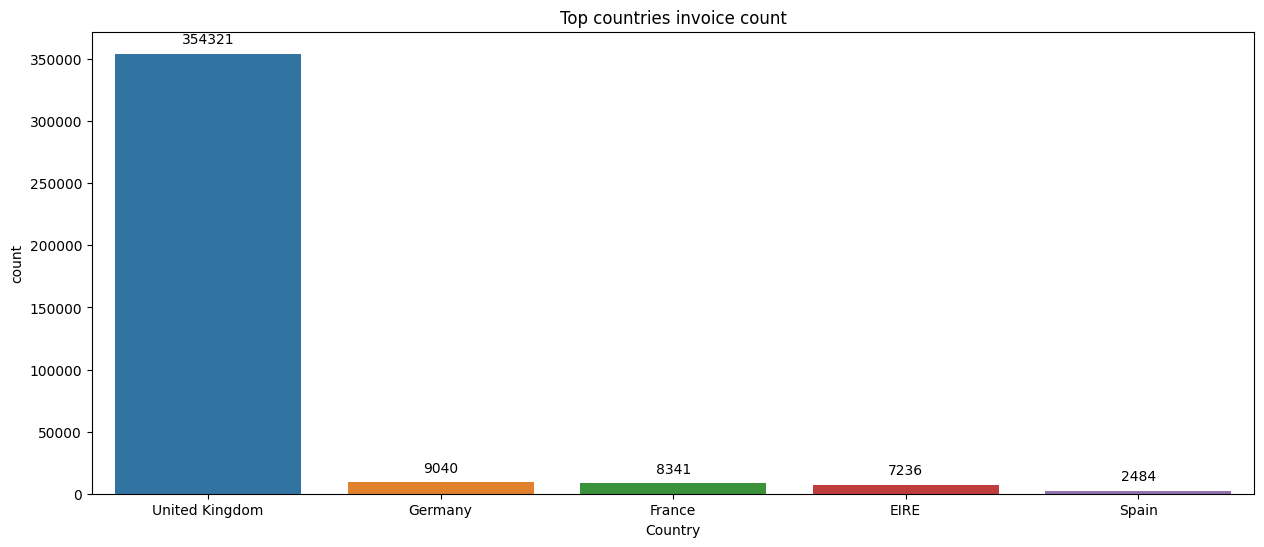

In [16]:
# Analyse the top 10 countries sales records

top_countries = customer_df['Country'].value_counts().sort_values(ascending=False)[:5]

# Visualize the above insight

plt.figure(figsize=(15,6))
ax = sns.countplot(x='Country',data=customer_df[customer_df['Country'].isin(top_countries.index)],order=top_countries.index)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title('Top countries invoice count')
plt.show()

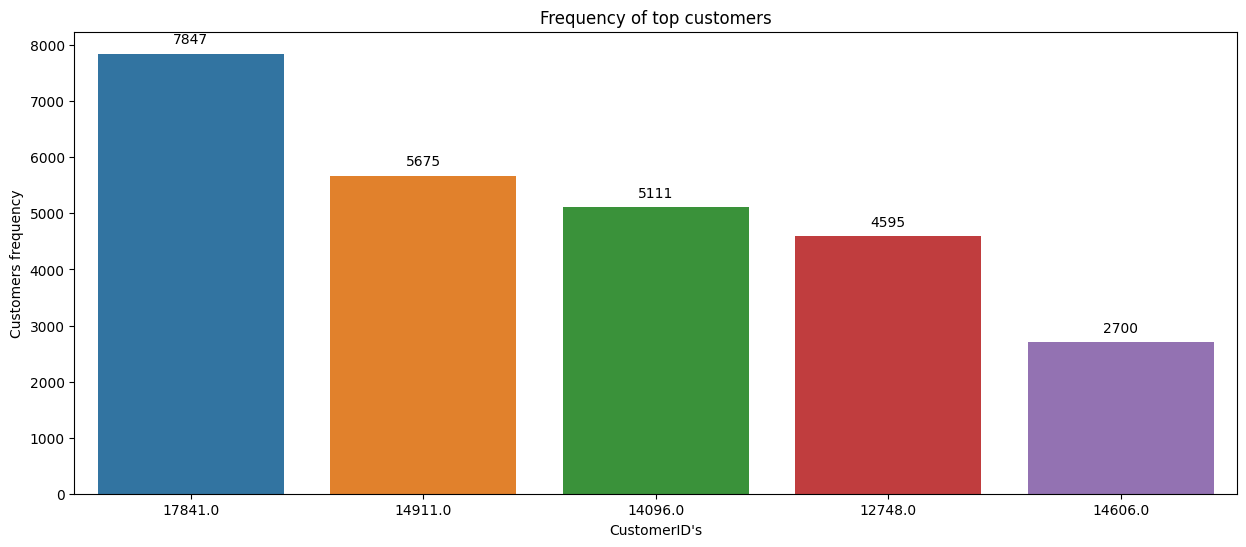

In [17]:
# Top 5 customers on the basis of Customer ID
top_customers = customer_df['CustomerID'].value_counts().sort_values(ascending=False).head()

# Plot the frequency of top customers

plt.figure(figsize=(15,6))
ax = sns.countplot(x='CustomerID',data=customer_df[customer_df['CustomerID'].isin(top_customers.index)],order=top_customers.index)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.xlabel("CustomerID's")
plt.ylabel("Customers frequency")
plt.title('Frequency of top customers')
plt.show()

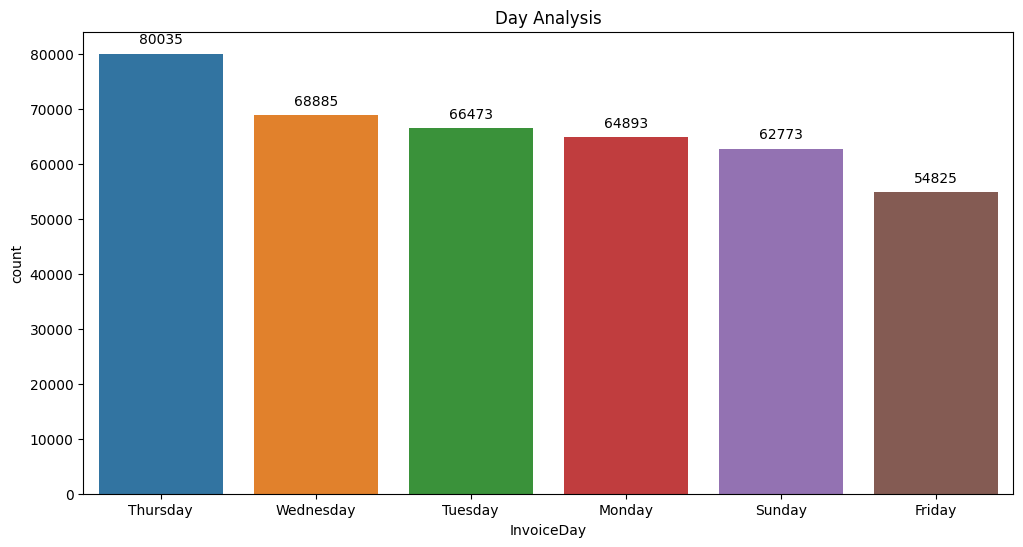

In [18]:
# Day analysis - Most recorded sales

day_analysis = customer_df['InvoiceDay'].value_counts().sort_values(ascending=False)

# Visualize the above insight

plt.figure(figsize=(12,6))
ax = sns.countplot(x='InvoiceDay',data=customer_df[customer_df['InvoiceDay'].isin(day_analysis.index)],order=day_analysis.index)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title('Day Analysis')
plt.show()

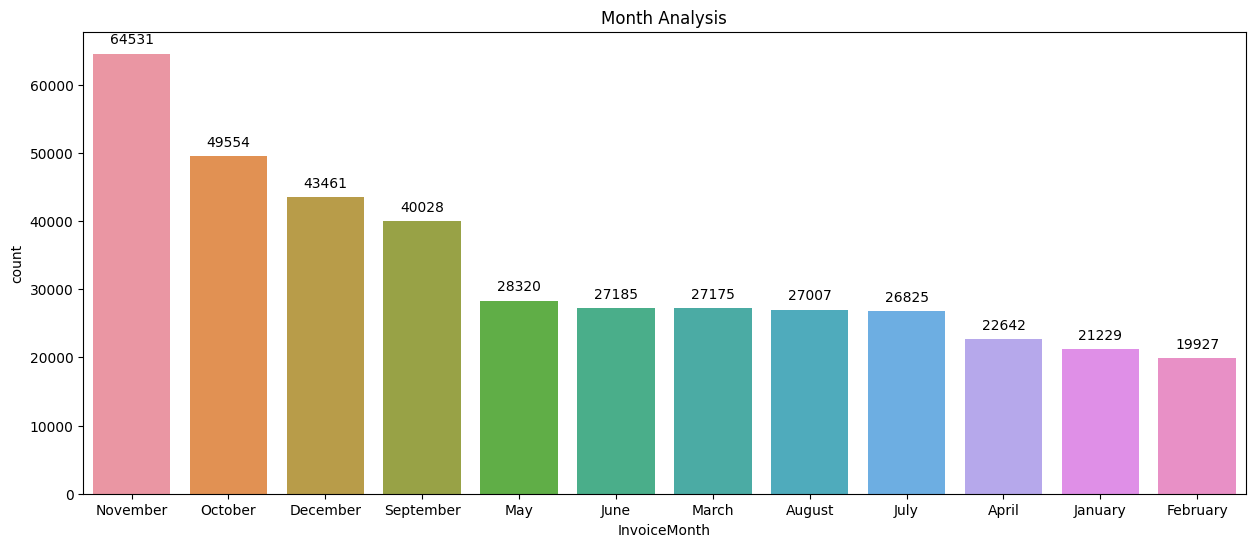

In [19]:
# Month analysis

month_analysis = customer_df['InvoiceMonth'].value_counts().sort_values(ascending=False)

# Visualize the above insight

plt.figure(figsize=(15,6))
ax = sns.countplot(x='InvoiceMonth',data=customer_df[customer_df['InvoiceMonth'].isin(month_analysis.index)],order=month_analysis.index)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title('Month Analysis')
plt.show()

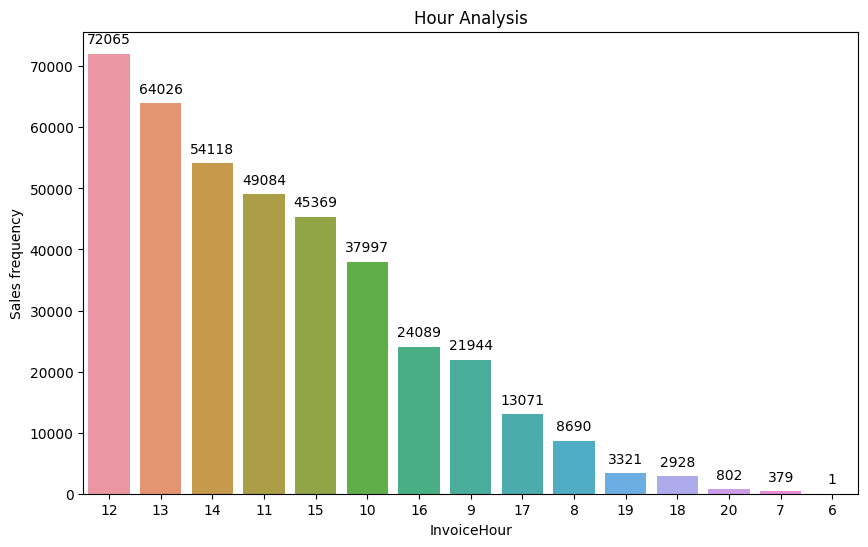

In [20]:
# Sales - Hour analysis

hour_analysis = customer_df['InvoiceHour'].value_counts().sort_values(ascending=False)

# Visualize the above insight

plt.figure(figsize=(10,6))
ax = sns.countplot(x='InvoiceHour',data=customer_df[customer_df['InvoiceHour'].isin(hour_analysis.index)],order=hour_analysis.index)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.ylabel("Sales frequency")
plt.title('Hour Analysis')
plt.show()

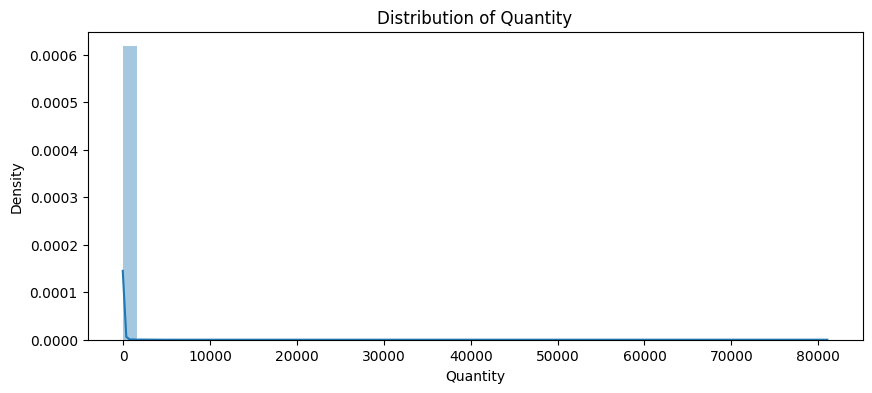

In [21]:
# Lets check the distribution of Quantity

plt.figure(figsize=(10,4))
plt.title('Distribution of Quantity')
sns.distplot(customer_df['Quantity'])
plt.show()

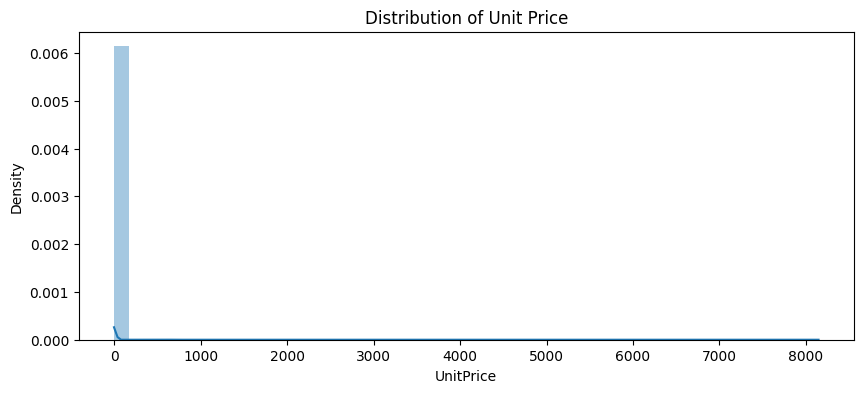

In [22]:
# Lets check the distribution of Unit price

plt.figure(figsize=(10,4))
plt.title('Distribution of Unit Price')
sns.distplot(customer_df['UnitPrice'])
plt.show()

###**Insights from Exploratory Data Analysis**
- Majority of the customers are from United Kingdom followed by Germany and France.
- Customer with ID 17841.0 has purchased more from the online retail shop, followed by 14911.0 and 14096.0
- Thursday bagged more number of sales followed by Wednesday and Tuesday. There is no transaction happened at Saturday with this given period.
- From the given data, More number of sales in recorded in the month of November followed by October and December.
- From noon 12 to 14 are peek hours for this online retail shop.
- Distribution of Unit price and Quantity were rightly skewed.

### **Feature Engineering**

####Create a feature called PurchaseAmount using unit price and quantity

In [23]:
# Create PurchaseAmount column multipling unit price and quantity

customer_df['PurchaseAmount']= customer_df['Quantity'] * customer_df['UnitPrice']

customer_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,InvoiceDay,InvoiceHour,PurchaseAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,December,Wednesday,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,December,Wednesday,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday,8,20.34


###**RFM(Recency, Frequency, Monetory) Analysis**

####**Recency**(Most recent purchase by customer.)- Calculate the number of days between present date and date of last purchase each customer.

####**Frequency**(How many times the customer purchased.)- Calculate the number of orders for each customer.

####**Monetary**(How much revenue generated through the customer.)- Calculate sum of purchase price for each customer

In [24]:
# Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
latest_date = dt.datetime(2011,12,10)

# Create RFM Modelling scores for each customer
rfm_df = customer_df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (latest_date - x.max()).days,  # Recency = Latest Date - Last Invoice Date
                                                'InvoiceNo': lambda x: len(x),                          # Frequency = count of invoice no. of transaction(s)
                                                'PurchaseAmount': lambda x: x.sum()})                      # Monetary = Sum of Total Price

# Convert Invoice Date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

# Rename column names to Recency, Frequency and Monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'PurchaseAmount': 'Monetary'}, inplace=True)

# checking the rfm_df dataset
rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40


In [26]:
rfm_df.describe()

,Recency,Frequency,Monetary
count,4338.000000,4338.000000,4338.000000
mean,92.059474,91.720609,2054.266460
std,100.012264,228.785094,8989.230441
min,0.000000,1.000000,3.750000
25%,17.000000,17.000000,307.415000
50%,50.000000,41.000000,674.485000
75%,141.750000,100.000000,1661.740000
max,373.000000,7847.000000,280206.020000


##**Feature Scaling**